In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls /content/drive/MyDrive/


 colored_images  'major '   Untitled0.ipynb


In [ ]:
!ls "/content/drive/MyDrive/major "



'C. Diabetic Retinopathy Grading'   sample    segmenation.ipynb
 FinalDataSet			    sample1   unet_best_model.h5


In [ ]:
import os

data_path = "/content/data/"

if os.path.exists(data_path):
    print(" Directory exists.")
else:
    print("Directory NOT found! Creating it now...")
    os.makedirs(data_path)
    print(" Directory created successfully!")



Directory NOT found! Creating it now...
 Directory created successfully!


In [ ]:
!ls "/content/drive/MyDrive/major /dataset/"


test  training


In [ ]:
!mv "/content/drive/MyDrive/major /dataset/" "/content/data/"


In [ ]:

import os
import numpy as np
import tensorflow as tf


# Load images and masks
image_folder = 'dataset/training/images'
mask_folder = 'dataset/training/1st_manual'
image_files = sorted(os.listdir(image_folder))
mask_files = sorted(os.listdir(mask_folder))

# Step 2: Data Preprocessing
X = []
y = []

for img_file, mask_file in zip(image_files, mask_files):
    img_path = os.path.join(image_folder, img_file)
    mask_path = os.path.join(mask_folder, mask_file)

    img = tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))) / 255.0
    mask = tf.keras.utils.to_categorical(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(mask_path, target_size=(128, 128)))[:, :, 0] > 127, num_classes=2)

    X.append(img)
    y.append(mask)

X = np.array(X)
y = np.array(y)



In [ ]:
X.shape,y.shape

((20, 128, 128, 3), (20, 128, 128, 2))

In [ ]:
import tensorflow as tf

def attention_gate(input_signal, gating_signal, inter_channels):
    theta_x = tf.keras.layers.Conv2D(inter_channels, (1, 1), activation='relu', padding='same')(input_signal)
    phi_g = tf.keras.layers.Conv2D(inter_channels, (1, 1), activation='sigmoid', padding='same')(gating_signal)
    psi_f = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(tf.keras.layers.add([theta_x, phi_g]))
    return tf.keras.layers.multiply([input_signal, psi_f])

def att_unet():
    inputs = tf.keras.layers.Input((128, 128, 3))
    conv1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)

    up6 = tf.keras.layers.concatenate([tf.keras.layers.UpSampling2D(size=(2, 2))(conv5), conv4], axis=3)
    up6 = attention_gate(up6, conv4, 256)
    conv6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
    conv6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = tf.keras.layers.concatenate([tf.keras.layers.UpSampling2D(size=(2, 2))(conv6), conv3], axis=3)
    up7 = attention_gate(up7, conv3, 128)
    conv7 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
    conv7 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = tf.keras.layers.concatenate([tf.keras.layers.UpSampling2D(size=(2, 2))(conv7), conv2], axis=3)
    up8 = attention_gate(up8, conv2, 64)
    conv8 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
    conv8 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = tf.keras.layers.concatenate([tf.keras.layers.UpSampling2D(size=(2, 2))(conv8), conv1], axis=3)
    up9 = attention_gate(up9, conv1, 32)
    conv9 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    conv9 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    outputs = tf.keras.layers.Conv2D(2, (1, 1), activation='softmax')(conv9)

    return tf.keras.models.Model(inputs=[inputs], outputs=[outputs])

In [9]:
pip install pydot

  Using cached pydot-3.0.4-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install pydot graphviz


     -------------------------------------- 47.1/47.1 kB 472.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# Create the Attention U-Net model
model = att_unet()
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 8, 8, 512)      │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 8, 8, 1024)     │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 8, 8, 1024)     │      9,438,208 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 16, 16, 1024)   │              0 │ conv2d_9[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 1536)   │              0 │ up_sampling2d[0][0],   │
│                      

 Total params: 32,076,774 (122.36 MB)

 Trainable params: 32,076,774 (122.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
checkpoint = tf.keras.callbacks.ModelCheckpoint('unet_best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model with the added checkpoint
model.fit(X, y, batch_size=2, epochs=300, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9110 - loss: 0.8132
Epoch 1: val_accuracy improved from -inf to 0.91687, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.9113 - loss: 0.7909 - val_accuracy: 0.9169 - val_loss: 0.3336
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9155 - loss: 0.3233
Epoch 2: val_accuracy did not improve from 0.91687
8/8 ━━━━━━━━━━━━━━━━━━━━ 73s 5s/step - accuracy: 0.9152 - loss: 0.3238 - val_accuracy: 0.9169 - val_loss: 0.2897
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9141 - loss: 0.2798
Epoch 3: val_accuracy did not improve from 0.91687
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9140 - loss: 0.2793 - val_accuracy: 0.9169 - val_loss: 0.2687
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9152 - loss: 0.2692
Epoch 4: val_accuracy did not improve from 0.91687
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9150 - loss: 0.2691 - val_accuracy: 0.9169 - val_loss: 0.2574
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9181 - loss: 0.2555
Epoch 5: val_accuracy did not improve from 0.91687
8/8 ━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9159 - loss: 0.2186 - val_accuracy: 0.9237 - val_loss: 0.2126
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9230 - loss: 0.2135
Epoch 77: val_accuracy improved from 0.92366 to 0.92606, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9228 - loss: 0.2141 - val_accuracy: 0.9261 - val_loss: 0.2123
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9225 - loss: 0.2190
Epoch 78: val_accuracy improved from 0.92606 to 0.92975, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9226 - loss: 0.2189 - val_accuracy: 0.9297 - val_loss: 0.2091
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9266 - loss: 0.2111
Epoch 79: val_accuracy improved from 0.92975 to 0.93048, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - accuracy: 0.9263 - loss: 0.2115 - val_accuracy: 0.9305 - val_loss: 0.2089
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9276 - loss: 0.2144
Epoch 80: val_accuracy improved from 0.93048 to 0.93199, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.9273 - loss: 0.2145 - val_accuracy: 0.9320 - val_loss: 0.2054
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9329 - loss: 0.2031
Epoch 81: val_accuracy improved from 0.93199 to 0.93271, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9322 - loss: 0.2039 - val_accuracy: 0.9327 - val_loss: 0.2022
Epoch 82/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9327 - loss: 0.2014
Epoch 82: val_accuracy did not improve from 0.93271
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9322 - loss: 0.2020 - val_accuracy: 0.9323 - val_loss: 0.1958
Epoch 83/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9309 - loss: 0.1996
Epoch 83: val_accuracy improved from 0.93271 to 0.93474, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9307 - loss: 0.1999 - val_accuracy: 0.9347 - val_loss: 0.1936
Epoch 84/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9281 - loss: 0.2051
Epoch 84: val_accuracy did not improve from 0.93474
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9283 - loss: 0.2043 - val_accuracy: 0.9319 - val_loss: 0.1863
Epoch 85/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9314 - loss: 0.1949
Epoch 85: val_accuracy did not improve from 0.93474
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9314 - loss: 0.1949 - val_accuracy: 0.9299 - val_loss: 0.1890
Epoch 86/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9274 - loss: 0.2054
Epoch 86: val_accuracy did not improve from 0.93474
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9280 - loss: 0.2041 - val_accuracy: 0.9332 - val_loss: 0.1817
Epoch 87/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9314 - loss: 0.1936
Epoch 87: val_accuracy improved from 0.93474 to 0.93544, sav

8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.9315 - loss: 0.1933 - val_accuracy: 0.9354 - val_loss: 0.1750
Epoch 88/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9331 - loss: 0.1900
Epoch 88: val_accuracy improved from 0.93544 to 0.93561, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9333 - loss: 0.1895 - val_accuracy: 0.9356 - val_loss: 0.1762
Epoch 89/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9389 - loss: 0.1789
Epoch 89: val_accuracy improved from 0.93561 to 0.93982, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9386 - loss: 0.1796 - val_accuracy: 0.9398 - val_loss: 0.1696
Epoch 90/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9382 - loss: 0.1766
Epoch 90: val_accuracy improved from 0.93982 to 0.94170, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9381 - loss: 0.1770 - val_accuracy: 0.9417 - val_loss: 0.1653
Epoch 91/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9386 - loss: 0.1748
Epoch 91: val_accuracy did not improve from 0.94170
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9384 - loss: 0.1753 - val_accuracy: 0.9403 - val_loss: 0.1642
Epoch 92/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9348 - loss: 0.1807
Epoch 92: val_accuracy did not improve from 0.94170
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9349 - loss: 0.1805 - val_accuracy: 0.9386 - val_loss: 0.1661
Epoch 93/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9367 - loss: 0.1783
Epoch 93: val_accuracy did not improve from 0.94170
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9368 - loss: 0.1782 - val_accuracy: 0.9394 - val_loss: 0.1657
Epoch 94/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9367 - loss: 0.1798
Epoch 94: val_accuracy improved from 0.94170 to 0.94420, sav

8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9369 - loss: 0.1796 - val_accuracy: 0.9442 - val_loss: 0.1597
Epoch 95/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9346 - loss: 0.1816
Epoch 95: val_accuracy improved from 0.94420 to 0.94534, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9349 - loss: 0.1809 - val_accuracy: 0.9453 - val_loss: 0.1623
Epoch 96/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9387 - loss: 0.1733
Epoch 96: val_accuracy did not improve from 0.94534
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9387 - loss: 0.1734 - val_accuracy: 0.9439 - val_loss: 0.1592
Epoch 97/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9425 - loss: 0.1643
Epoch 97: val_accuracy improved from 0.94534 to 0.94554, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9420 - loss: 0.1654 - val_accuracy: 0.9455 - val_loss: 0.1650
Epoch 98/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9331 - loss: 0.1839
Epoch 98: val_accuracy did not improve from 0.94554
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9337 - loss: 0.1827 - val_accuracy: 0.9446 - val_loss: 0.1603
Epoch 99/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9436 - loss: 0.1648
Epoch 99: val_accuracy improved from 0.94554 to 0.94629, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.9433 - loss: 0.1655 - val_accuracy: 0.9463 - val_loss: 0.1521
Epoch 100/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9449 - loss: 0.1594
Epoch 100: val_accuracy did not improve from 0.94629
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9445 - loss: 0.1603 - val_accuracy: 0.9447 - val_loss: 0.1535
Epoch 101/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9384 - loss: 0.1746
Epoch 101: val_accuracy improved from 0.94629 to 0.94641, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9387 - loss: 0.1737 - val_accuracy: 0.9464 - val_loss: 0.1510
Epoch 102/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9419 - loss: 0.1635
Epoch 102: val_accuracy improved from 0.94641 to 0.94794, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9420 - loss: 0.1636 - val_accuracy: 0.9479 - val_loss: 0.1557
Epoch 103/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9426 - loss: 0.1655
Epoch 103: val_accuracy did not improve from 0.94794
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.9426 - loss: 0.1652 - val_accuracy: 0.9479 - val_loss: 0.1493
Epoch 104/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9428 - loss: 0.1651
Epoch 104: val_accuracy did not improve from 0.94794
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9429 - loss: 0.1649 - val_accuracy: 0.9455 - val_loss: 0.1527
Epoch 105/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9430 - loss: 0.1653
Epoch 105: val_accuracy improved from 0.94794 to 0.94902, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9430 - loss: 0.1652 - val_accuracy: 0.9490 - val_loss: 0.1477
Epoch 106/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9479 - loss: 0.1515
Epoch 106: val_accuracy improved from 0.94902 to 0.94969, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9474 - loss: 0.1526 - val_accuracy: 0.9497 - val_loss: 0.1514
Epoch 107/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9452 - loss: 0.1584
Epoch 107: val_accuracy did not improve from 0.94969
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9448 - loss: 0.1590 - val_accuracy: 0.9490 - val_loss: 0.1518
Epoch 108/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9408 - loss: 0.1668
Epoch 108: val_accuracy did not improve from 0.94969
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9412 - loss: 0.1660 - val_accuracy: 0.9488 - val_loss: 0.1445
Epoch 109/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9442 - loss: 0.1585
Epoch 109: val_accuracy did not improve from 0.94969
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9442 - loss: 0.1584 - val_accuracy: 0.9496 - val_loss: 0.1459
Epoch 110/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9461 - loss: 0.1568
Epoch 110: val_accuracy improved from 0.94969 to 0.94

8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9461 - loss: 0.1567 - val_accuracy: 0.9498 - val_loss: 0.1423
Epoch 111/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9416 - loss: 0.1633
Epoch 111: val_accuracy did not improve from 0.94981
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9418 - loss: 0.1628 - val_accuracy: 0.9498 - val_loss: 0.1442
Epoch 112/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9448 - loss: 0.1587
Epoch 112: val_accuracy did not improve from 0.94981
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9448 - loss: 0.1586 - val_accuracy: 0.9496 - val_loss: 0.1425
Epoch 113/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9446 - loss: 0.1581
Epoch 113: val_accuracy did not improve from 0.94981
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9449 - loss: 0.1578 - val_accuracy: 0.9497 - val_loss: 0.1420
Epoch 114/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9471 - loss: 0.1519
Epoch 114: val_accuracy improved from 0.94981 to 0.95

8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9469 - loss: 0.1525 - val_accuracy: 0.9500 - val_loss: 0.1419
Epoch 115/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9441 - loss: 0.1597
Epoch 115: val_accuracy did not improve from 0.95001
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9444 - loss: 0.1591 - val_accuracy: 0.9490 - val_loss: 0.1414
Epoch 116/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9485 - loss: 0.1451
Epoch 116: val_accuracy improved from 0.95001 to 0.95027, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9483 - loss: 0.1459 - val_accuracy: 0.9503 - val_loss: 0.1452
Epoch 117/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9499 - loss: 0.1486
Epoch 117: val_accuracy did not improve from 0.95027
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9496 - loss: 0.1489 - val_accuracy: 0.9495 - val_loss: 0.1420
Epoch 118/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9445 - loss: 0.1588
Epoch 118: val_accuracy improved from 0.95027 to 0.95123, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9446 - loss: 0.1588 - val_accuracy: 0.9512 - val_loss: 0.1385
Epoch 119/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9462 - loss: 0.1537
Epoch 119: val_accuracy improved from 0.95123 to 0.95177, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.9463 - loss: 0.1537 - val_accuracy: 0.9518 - val_loss: 0.1368
Epoch 120/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9475 - loss: 0.1514
Epoch 120: val_accuracy improved from 0.95177 to 0.95233, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9474 - loss: 0.1518 - val_accuracy: 0.9523 - val_loss: 0.1403
Epoch 121/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9485 - loss: 0.1467
Epoch 121: val_accuracy improved from 0.95233 to 0.95264, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9484 - loss: 0.1471 - val_accuracy: 0.9526 - val_loss: 0.1365
Epoch 122/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9461 - loss: 0.1519
Epoch 122: val_accuracy did not improve from 0.95264
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9462 - loss: 0.1515 - val_accuracy: 0.9525 - val_loss: 0.1398
Epoch 123/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9498 - loss: 0.1453
Epoch 123: val_accuracy improved from 0.95264 to 0.95309, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9496 - loss: 0.1456 - val_accuracy: 0.9531 - val_loss: 0.1373
Epoch 124/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9475 - loss: 0.1490
Epoch 124: val_accuracy did not improve from 0.95309
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9475 - loss: 0.1491 - val_accuracy: 0.9518 - val_loss: 0.1423
Epoch 125/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9514 - loss: 0.1442
Epoch 125: val_accuracy did not improve from 0.95309
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9512 - loss: 0.1445 - val_accuracy: 0.9522 - val_loss: 0.1342
Epoch 126/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9467 - loss: 0.1510
Epoch 126: val_accuracy did not improve from 0.95309
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9469 - loss: 0.1505 - val_accuracy: 0.9529 - val_loss: 0.1336
Epoch 127/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9476 - loss: 0.1508
Epoch 127: val_accuracy did not improve from 0.95309


8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9514 - loss: 0.1394 - val_accuracy: 0.9535 - val_loss: 0.1323
Epoch 129/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9528 - loss: 0.1367
Epoch 129: val_accuracy did not improve from 0.95351
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9524 - loss: 0.1375 - val_accuracy: 0.9529 - val_loss: 0.1320
Epoch 130/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9496 - loss: 0.1428
Epoch 130: val_accuracy improved from 0.95351 to 0.95427, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.9496 - loss: 0.1428 - val_accuracy: 0.9543 - val_loss: 0.1316
Epoch 131/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9516 - loss: 0.1397
Epoch 131: val_accuracy did not improve from 0.95427
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9515 - loss: 0.1399 - val_accuracy: 0.9540 - val_loss: 0.1300
Epoch 132/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9449 - loss: 0.1534
Epoch 132: val_accuracy did not improve from 0.95427
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9455 - loss: 0.1520 - val_accuracy: 0.9533 - val_loss: 0.1348
Epoch 133/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9521 - loss: 0.1389
Epoch 133: val_accuracy did not improve from 0.95427
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9519 - loss: 0.1392 - val_accuracy: 0.9527 - val_loss: 0.1349
Epoch 134/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9493 - loss: 0.1441
Epoch 134: val_accuracy improved from 0.95427 to 0.95

8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9493 - loss: 0.1437 - val_accuracy: 0.9543 - val_loss: 0.1329
Epoch 135/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9526 - loss: 0.1392
Epoch 135: val_accuracy improved from 0.95435 to 0.95459, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9524 - loss: 0.1395 - val_accuracy: 0.9546 - val_loss: 0.1299
Epoch 136/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9522 - loss: 0.1373
Epoch 136: val_accuracy did not improve from 0.95459
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9522 - loss: 0.1373 - val_accuracy: 0.9545 - val_loss: 0.1314
Epoch 137/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9531 - loss: 0.1362
Epoch 137: val_accuracy did not improve from 0.95459
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9529 - loss: 0.1365 - val_accuracy: 0.9542 - val_loss: 0.1283
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9475 - loss: 0.1480
Epoch 138: val_accuracy improved from 0.95459 to 0.95493, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.9479 - loss: 0.1470 - val_accuracy: 0.9549 - val_loss: 0.1276
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9472 - loss: 0.1497
Epoch 139: val_accuracy did not improve from 0.95493
8/8 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.9477 - loss: 0.1485 - val_accuracy: 0.9549 - val_loss: 0.1265
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9530 - loss: 0.1358
Epoch 140: val_accuracy improved from 0.95493 to 0.95528, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.9528 - loss: 0.1362 - val_accuracy: 0.9553 - val_loss: 0.1256
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9509 - loss: 0.1397
Epoch 141: val_accuracy did not improve from 0.95528
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.9511 - loss: 0.1395 - val_accuracy: 0.9551 - val_loss: 0.1264
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9488 - loss: 0.1451
Epoch 142: val_accuracy improved from 0.95528 to 0.95601, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9491 - loss: 0.1445 - val_accuracy: 0.9560 - val_loss: 0.1273
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9544 - loss: 0.1349
Epoch 143: val_accuracy did not improve from 0.95601
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9541 - loss: 0.1356 - val_accuracy: 0.9548 - val_loss: 0.1307
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9521 - loss: 0.1420
Epoch 144: val_accuracy improved from 0.95601 to 0.95638, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9521 - loss: 0.1419 - val_accuracy: 0.9564 - val_loss: 0.1322
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9495 - loss: 0.1475
Epoch 145: val_accuracy did not improve from 0.95638
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9497 - loss: 0.1469 - val_accuracy: 0.9551 - val_loss: 0.1282
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9520 - loss: 0.1391
Epoch 146: val_accuracy improved from 0.95638 to 0.95657, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.9521 - loss: 0.1388 - val_accuracy: 0.9566 - val_loss: 0.1244
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9510 - loss: 0.1386
Epoch 147: val_accuracy did not improve from 0.95657
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.9512 - loss: 0.1384 - val_accuracy: 0.9564 - val_loss: 0.1246
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9507 - loss: 0.1384
Epoch 148: val_accuracy did not improve from 0.95657
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9509 - loss: 0.1380 - val_accuracy: 0.9565 - val_loss: 0.1240
Epoch 149/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9558 - loss: 0.1276
Epoch 149: val_accuracy did not improve from 0.95657
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9554 - loss: 0.1286 - val_accuracy: 0.9514 - val_loss: 0.1400
Epoch 150/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9549 - loss: 0.1325
Epoch 150: val_accuracy did not improve from 0.95657


8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9550 - loss: 0.1354 - val_accuracy: 0.9569 - val_loss: 0.1268
Epoch 159/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9500 - loss: 0.1440
Epoch 159: val_accuracy did not improve from 0.95691
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9503 - loss: 0.1432 - val_accuracy: 0.9556 - val_loss: 0.1276
Epoch 160/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9539 - loss: 0.1347
Epoch 160: val_accuracy improved from 0.95691 to 0.95752, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.9540 - loss: 0.1346 - val_accuracy: 0.9575 - val_loss: 0.1228
Epoch 161/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9527 - loss: 0.1352
Epoch 161: val_accuracy did not improve from 0.95752
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9530 - loss: 0.1348 - val_accuracy: 0.9564 - val_loss: 0.1268
Epoch 162/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9514 - loss: 0.1385
Epoch 162: val_accuracy did not improve from 0.95752
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9517 - loss: 0.1377 - val_accuracy: 0.9567 - val_loss: 0.1258
Epoch 163/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9499 - loss: 0.1469
Epoch 163: val_accuracy did not improve from 0.95752
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9500 - loss: 0.1464 - val_accuracy: 0.9556 - val_loss: 0.1258
Epoch 164/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9503 - loss: 0.1428
Epoch 164: val_accuracy did not improve from 0.95752


8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9562 - loss: 0.1279 - val_accuracy: 0.9586 - val_loss: 0.1264
Epoch 167/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9585 - loss: 0.1255
Epoch 167: val_accuracy did not improve from 0.95865
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9580 - loss: 0.1262 - val_accuracy: 0.9560 - val_loss: 0.1259
Epoch 168/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9558 - loss: 0.1286
Epoch 168: val_accuracy did not improve from 0.95865
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9557 - loss: 0.1286 - val_accuracy: 0.9582 - val_loss: 0.1200
Epoch 169/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9573 - loss: 0.1243
Epoch 169: val_accuracy did not improve from 0.95865
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9571 - loss: 0.1248 - val_accuracy: 0.9572 - val_loss: 0.1230
Epoch 170/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9580 - loss: 0.1222
Epoch 170: val_accuracy did not improve from 0.95865


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9543 - loss: 0.1293 - val_accuracy: 0.9588 - val_loss: 0.1199
Epoch 184/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9558 - loss: 0.1294
Epoch 184: val_accuracy did not improve from 0.95880
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9558 - loss: 0.1293 - val_accuracy: 0.9579 - val_loss: 0.1211
Epoch 185/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9582 - loss: 0.1231
Epoch 185: val_accuracy did not improve from 0.95880
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.9579 - loss: 0.1236 - val_accuracy: 0.9557 - val_loss: 0.1267
Epoch 186/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9544 - loss: 0.1306
Epoch 186: val_accuracy did not improve from 0.95880
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9546 - loss: 0.1301 - val_accuracy: 0.9580 - val_loss: 0.1206
Epoch 187/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9525 - loss: 0.1323
Epoch 187: val_accuracy did not improve from 0.95880


8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9580 - loss: 0.1223 - val_accuracy: 0.9591 - val_loss: 0.1191
Epoch 191/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9596 - loss: 0.1174
Epoch 191: val_accuracy did not improve from 0.95908
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9593 - loss: 0.1182 - val_accuracy: 0.9551 - val_loss: 0.1296
Epoch 192/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9525 - loss: 0.1341
Epoch 192: val_accuracy did not improve from 0.95908
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9529 - loss: 0.1332 - val_accuracy: 0.9562 - val_loss: 0.1252
Epoch 193/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9594 - loss: 0.1197
Epoch 193: val_accuracy did not improve from 0.95908
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9591 - loss: 0.1204 - val_accuracy: 0.9568 - val_loss: 0.1258
Epoch 194/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9571 - loss: 0.1252
Epoch 194: val_accuracy did not improve from 0.95908


8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9546 - loss: 0.1294 - val_accuracy: 0.9593 - val_loss: 0.1195
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9585 - loss: 0.1190
Epoch 215: val_accuracy did not improve from 0.95932
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9582 - loss: 0.1195 - val_accuracy: 0.9582 - val_loss: 0.1205
Epoch 216/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9543 - loss: 0.1303
Epoch 216: val_accuracy improved from 0.95932 to 0.95998, saving model to unet_best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.9545 - loss: 0.1298 - val_accuracy: 0.9600 - val_loss: 0.1179
Epoch 217/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9540 - loss: 0.1329
Epoch 217: val_accuracy did not improve from 0.95998
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9542 - loss: 0.1322 - val_accuracy: 0.9575 - val_loss: 0.1218
Epoch 218/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9548 - loss: 0.1304
Epoch 218: val_accuracy did not improve from 0.95998
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9549 - loss: 0.1301 - val_accuracy: 0.9585 - val_loss: 0.1209
Epoch 219/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9581 - loss: 0.1216
Epoch 219: val_accuracy did not improve from 0.95998
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9577 - loss: 0.1224 - val_accuracy: 0.9572 - val_loss: 0.1238
Epoch 220/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9535 - loss: 0.1358
Epoch 220: val_accuracy did not improve from 0.95998


8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.9583 - loss: 0.1199 - val_accuracy: 0.9601 - val_loss: 0.1160
Epoch 243/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9614 - loss: 0.1125
Epoch 243: val_accuracy did not improve from 0.96010
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.9612 - loss: 0.1131 - val_accuracy: 0.9568 - val_loss: 0.1244
Epoch 244/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9597 - loss: 0.1153
Epoch 244: val_accuracy did not improve from 0.96010
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9596 - loss: 0.1156 - val_accuracy: 0.9601 - val_loss: 0.1163
Epoch 245/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9592 - loss: 0.1178
Epoch 245: val_accuracy did not improve from 0.96010
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.9592 - loss: 0.1178 - val_accuracy: 0.9575 - val_loss: 0.1220
Epoch 246/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9607 - loss: 0.1146
Epoch 246: val_accuracy did not improve from 0.96010


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9608 - loss: 0.1133 - val_accuracy: 0.9605 - val_loss: 0.1159
Epoch 249/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9548 - loss: 0.1291
Epoch 249: val_accuracy did not improve from 0.96049
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9551 - loss: 0.1282 - val_accuracy: 0.9592 - val_loss: 0.1179
Epoch 250/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9609 - loss: 0.1129
Epoch 250: val_accuracy did not improve from 0.96049
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9607 - loss: 0.1135 - val_accuracy: 0.9576 - val_loss: 0.1205
Epoch 251/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9597 - loss: 0.1169
Epoch 251: val_accuracy did not improve from 0.96049
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9596 - loss: 0.1171 - val_accuracy: 0.9577 - val_loss: 0.1217
Epoch 252/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9618 - loss: 0.1112
Epoch 252: val_accuracy did not improve from 0.96049


8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step - accuracy: 0.9556 - loss: 0.1262 - val_accuracy: 0.9607 - val_loss: 0.1160
Epoch 264/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9596 - loss: 0.1173
Epoch 264: val_accuracy did not improve from 0.96068
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9595 - loss: 0.1175 - val_accuracy: 0.9591 - val_loss: 0.1179
Epoch 265/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9576 - loss: 0.1196
Epoch 265: val_accuracy did not improve from 0.96068
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9578 - loss: 0.1194 - val_accuracy: 0.9563 - val_loss: 0.1253
Epoch 266/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9609 - loss: 0.1121
Epoch 266: val_accuracy did not improve from 0.96068
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.9607 - loss: 0.1128 - val_accuracy: 0.9574 - val_loss: 0.1235
Epoch 267/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9588 - loss: 0.1196
Epoch 267: val_accuracy did not improve from 0.96068


8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9580 - loss: 0.1186 - val_accuracy: 0.9608 - val_loss: 0.1150
Epoch 292/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9613 - loss: 0.1125
Epoch 292: val_accuracy did not improve from 0.96083
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.9612 - loss: 0.1129 - val_accuracy: 0.9593 - val_loss: 0.1185
Epoch 293/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9575 - loss: 0.1210
Epoch 293: val_accuracy did not improve from 0.96083
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.9577 - loss: 0.1205 - val_accuracy: 0.9583 - val_loss: 0.1214
Epoch 294/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9565 - loss: 0.1236
Epoch 294: val_accuracy did not improve from 0.96083
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9568 - loss: 0.1228 - val_accuracy: 0.9606 - val_loss: 0.1154
Epoch 295/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9611 - loss: 0.1109
Epoch 295: val_accuracy did not improve from 0.96083


In [ ]:
import tensorflow as tf
import os

# Define the directory to save the model
save_dir = "/content/saved_models"
os.makedirs(save_dir, exist_ok=True)

# Save the model
model.save(os.path.join(save_dir, "unet_best_model.h5"))
print(f"Model saved at: {save_dir}/unet_best_model.h5")


Model saved at: /content/saved_models/unet_best_model.h5


In [ ]:
from google.colab import files

files.download("/content/saved_models/unet_best_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess and predict on a single image
def predict_image(model,input_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(input_path, target_size=(128, 128))) / 255.0
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = model.predict(img)

    # Convert prediction to binary mask
    mask = np.argmax(prediction[0], axis=-1)

    return mask

In [18]:
# Function to display the original image and predicted mask
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def display_images(input_path, mask):
    plt.figure(figsize=(10, 5))

    # Load and display the original image
    plt.subplot(1, 2, 1)
    img = tf.keras.preprocessing.image.load_img(input_path, target_size=(128, 128))
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')

    # Convert mask to binary format for visualization
    inverted_mask = np.invert(mask.astype(np.uint8))  # Ensure correct datatype

    # Display the predicted mask
    plt.subplot(1, 2, 2)
    plt.imshow(inverted_mask, cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

    # Save the predicted mask
    plt.imsave('test.png', inverted_mask, cmap='gray')

    plt.show()


In [19]:
import os

# List all files in the current directory
print("Files in current directory:", os.listdir())

# Check if the model file exists
model_path = "unet_best_model.h5"
if os.path.exists(model_path):
    print(" Model file found.")
else:
    print(" Model file NOT found! Please check the file path.")


Files in current directory: ['dataset', 'FinalDataSet', 'img.jpg', 'img.png', 'maj', 'requirements.txt', 'sample1', 'saved_model.h5', 'segmenation.ipynb', 'unet_best_model.h5', 'webapp.py']
 Model file found.


In [ ]:
!pip install pillow


In [22]:
from PIL import Image
import os
import shutil

# Define input and output directories (change paths accordingly)
input_dir = "dataset/test/images"  # Change this path
output_dir = "dataset/test/images_jpg"  # Output folder

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Convert all .tif images to .jpg
for filename in os.listdir(input_dir):
    if filename.endswith(".tif") or filename.endswith(".tiff"):
        img_path = os.path.join(input_dir, filename)
        img = Image.open(img_path)

        jpg_filename = os.path.splitext(filename)[0] + ".jpg"
        jpg_path = os.path.join(output_dir, jpg_filename)

        # Convert to RGB and save as JPG
        img.convert("RGB").save(jpg_path, "JPEG", quality=95)

        print(f"Converted {filename} → {jpg_filename}")

print(" Conversion complete!")


Converted 01_test.tif → 01_test.jpg
Converted 02_test.tif → 02_test.jpg
Converted 03_test.tif → 03_test.jpg
Converted 04_test.tif → 04_test.jpg
Converted 05_test.tif → 05_test.jpg
Converted 06_test.tif → 06_test.jpg
Converted 07_test.tif → 07_test.jpg
Converted 08_test.tif → 08_test.jpg
Converted 09_test.tif → 09_test.jpg
Converted 10_test.tif → 10_test.jpg
Converted 11_test.tif → 11_test.jpg
Converted 12_test.tif → 12_test.jpg
Converted 13_test.tif → 13_test.jpg
Converted 14_test.tif → 14_test.jpg
Converted 15_test.tif → 15_test.jpg
Converted 16_test.tif → 16_test.jpg
Converted 17_test.tif → 17_test.jpg
Converted 18_test.tif → 18_test.jpg
Converted 19_test.tif → 19_test.jpg
Converted 20_test.tif → 20_test.jpg
 Conversion complete!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


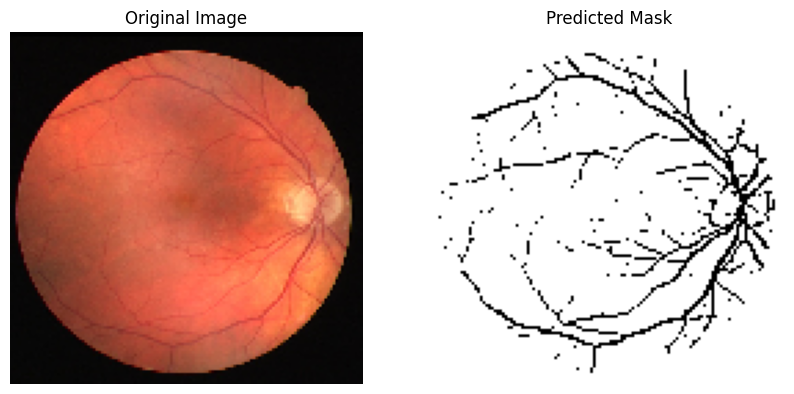

In [23]:
import tensorflow as tf
#load the model
model = tf.keras.models.load_model(r"C:\major\unet_best_model.h5")

# Provide the path of your test image
input_image_path = 'dataset/test/images_jpg/07_test.jpg'

# Get the predicted mask
predicted_mask = predict_image(model,input_image_path)

# Display the original image and predicted mask
display_images(input_image_path, predicted_mask)

In [ ]:
predicted_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
predicted_mask.shape

(128, 128)

cnn

In [27]:
!ls "/content/drive/MyDrive/major "

'C. Diabetic Retinopathy Grading'   sample    segmenation.ipynb
 FinalDataSet			    sample1   unet_best_model.h5


In [ ]:
!mv "/content/drive/MyDrive/major /dataset"  "/content/drive/MyDrive/colored_images"


mv: cannot stat '/content/drive/MyDrive/major /dataset': No such file or directory


In [28]:
!cp -r "/content/drive/MyDrive/colored_images" "/content/"


In [ ]:
!mkdir "/content/drive/MyDrive/major /sample"




In [ ]:
!mv "/content/drive/MyDrive/major /sample1/default.sh" "/content/drive/MyDrive/major /sample"

In [ ]:
import os
import random
import shutil

# Define the path to your images folder
images_folder = "C:\major\FinalDataSet"

# Define the classes
classes = os.listdir('/content/colored_images')

os.makedirs('/content/data1')
# Create train and validation folders
train_folder = os.path.join('/content/data', 'train')
val_folder = os.path.join('/content/data', 'validation')

os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Define the split ratio
split_ratio = 0.8

# Iterate through each class
for class_name in classes:
    class_folder = os.path.join(images_folder, class_name)
    images = os.listdir(class_folder)
    random.shuffle(images)  # Shuffle the images

    # Calculate the split index
    split_index = int(len(images) * split_ratio)

    # Split the images
    train_images = images[:split_index]
    val_images = images[split_index:]

    # Copy training images to train folder
    for image in train_images:
        src = os.path.join(class_folder, image)
        dst = os.path.join(train_folder, class_name, image)
        os.makedirs(os.path.join(train_folder, class_name), exist_ok=True)
        shutil.copy(src, dst)

    # Copy validation images to validation folder
    for image in val_images:
        src = os.path.join(class_folder, image)
        dst = os.path.join(val_folder, class_name, image)
        os.makedirs(os.path.join(val_folder, class_name), exist_ok=True)
        shutil.copy(src, dst)

print("Data split and folders created successfully.")

Data split and folders created successfully.


In [30]:
import os
train_path = '/content/data/train'
test_path = '/content/data/validation'
n_classes = 0
n_len_training = 0
d = {}
print('Training Files Details :\n')
for i in sorted(os.listdir(train_path)):
    print(f"Class Name = {i}")
    n_classes+=1
    l = len(os.listdir(os.path.join(train_path,i)))
    d[i] = [l]
    n_len_training+=l
    print(f"No of Images = {l}")
    print('='*50)

print(f'\nTotal No of Training Images = {n_len_training}')
print('='*50)
n_len_testing = 0
print('\n\nTest Files Details :\n')
for i in sorted(os.listdir(test_path)):
    print(f"Class Name = {i}")
    l = len(os.listdir(os.path.join(test_path,i)))
    d[i].append(l)
    n_len_testing+=l
    print(f"No of Images = {l}")
    print('='*50)
print(f'\nTotal No of Testing Images = {n_len_testing}')
print('='*50)
print(f'\n\nNo of classes = {n_classes}')

Training Files Details :

Class Name = MILD
No of Images = 906
Class Name = MODERATE
No of Images = 839
Class Name = NODR
No of Images = 808
Class Name = PDR
No of Images = 412
Class Name = SEVERE
No of Images = 447

Total No of Training Images = 3412


Test Files Details :

Class Name = MILD
No of Images = 227
Class Name = MODERATE
No of Images = 210
Class Name = NODR
No of Images = 203
Class Name = PDR
No of Images = 103
Class Name = SEVERE
No of Images = 112

Total No of Testing Images = 855


No of classes = 5


In [31]:
!mv /content/data/validation /content/data/test
!rm -rf /content/colored_images

In [32]:
d.keys()

dict_keys(['MILD', 'MODERATE', 'NODR', 'PDR', 'SEVERE'])

Training Data Distribution


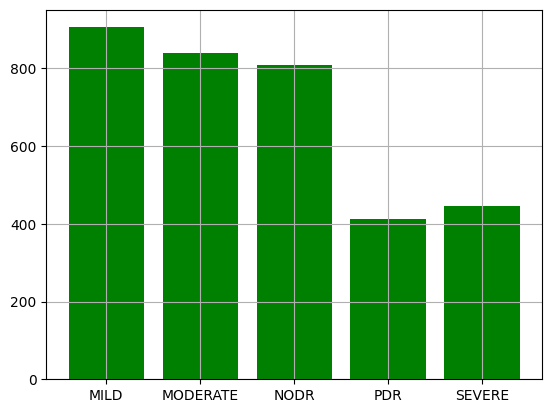

Testing Data Distribution


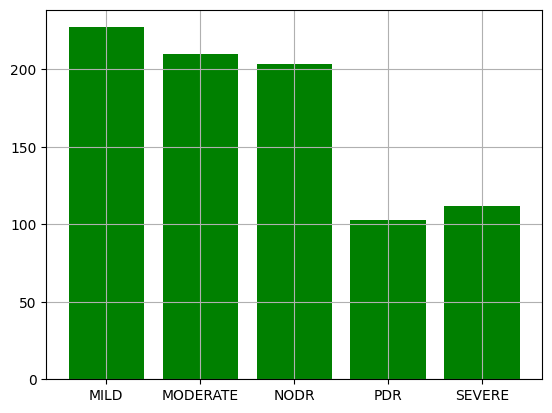

In [33]:
import matplotlib.pyplot as plt
cls = []
val1 = []
val2 = []
for i,j in d.items():
    cls.append(i)
    val1.append(j[0])
    val2.append(j[1])
data = [(cls,val1)]
data.append((cls,val2))

print(f"Training Data Distribution")
plt.bar(x = data[0][0],height= data[0][1],color='green')
plt.grid()
plt.show()
print('='*70)
print(f"Testing Data Distribution")
plt.bar(x = data[1][0],height= data[1][1],color='green')
plt.grid()
plt.show()

In [34]:
import numpy as np
d = {}
n_images = 5

for i in os.listdir(train_path):
    l = os.listdir(os.path.join(train_path,i))
    if len(l)>n_images:
        l = np.random.choice(l, n_images, replace=False).tolist()
    d[i] = list(map(lambda x:os.path.join(train_path,i,x),l))

In [35]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
for i in list(d.keys()):
    print('\nSample images of class : ',i)
    images = d[i]
    plt.figure(figsize=(30,8))
    for j in range(len(images)):
        img = mpimg.imread(images[j])
        plt.subplot(1, n_images, j+1)
        plt.imshow(img)

        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.


Sample images of class :  PDR
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


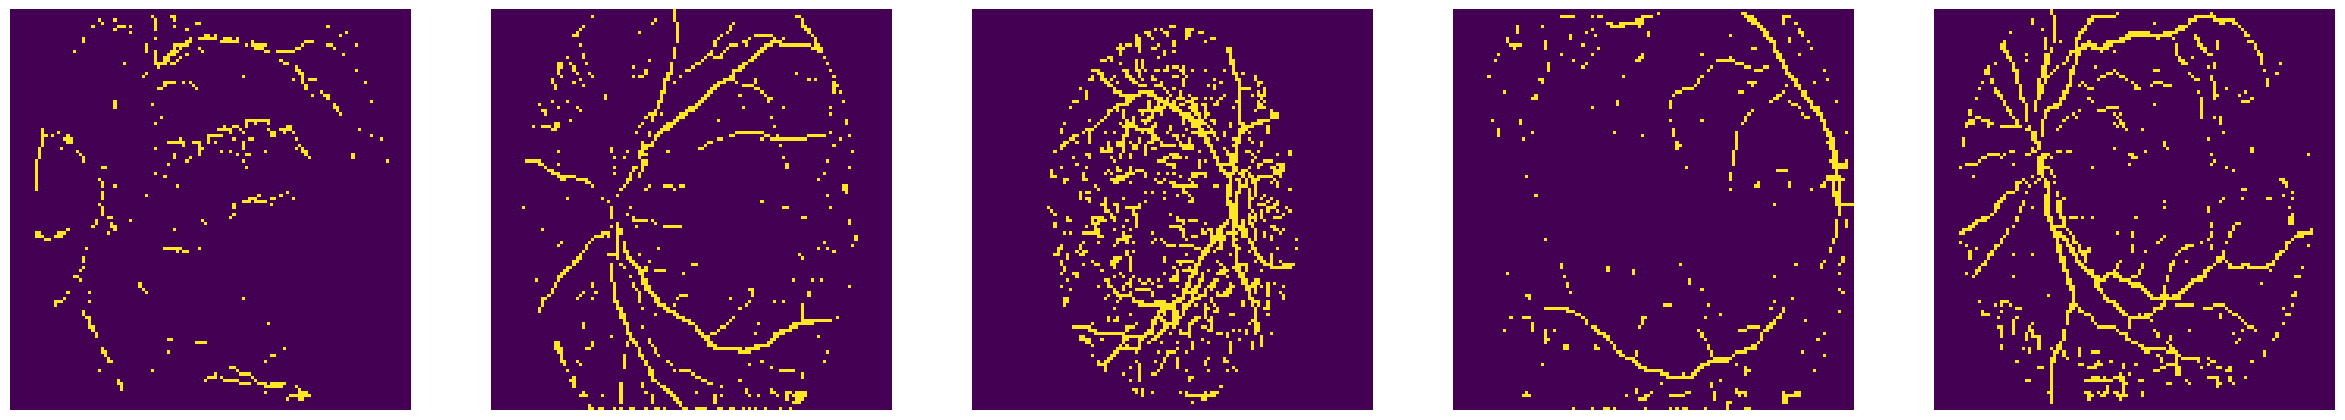


Sample images of class :  NODR
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


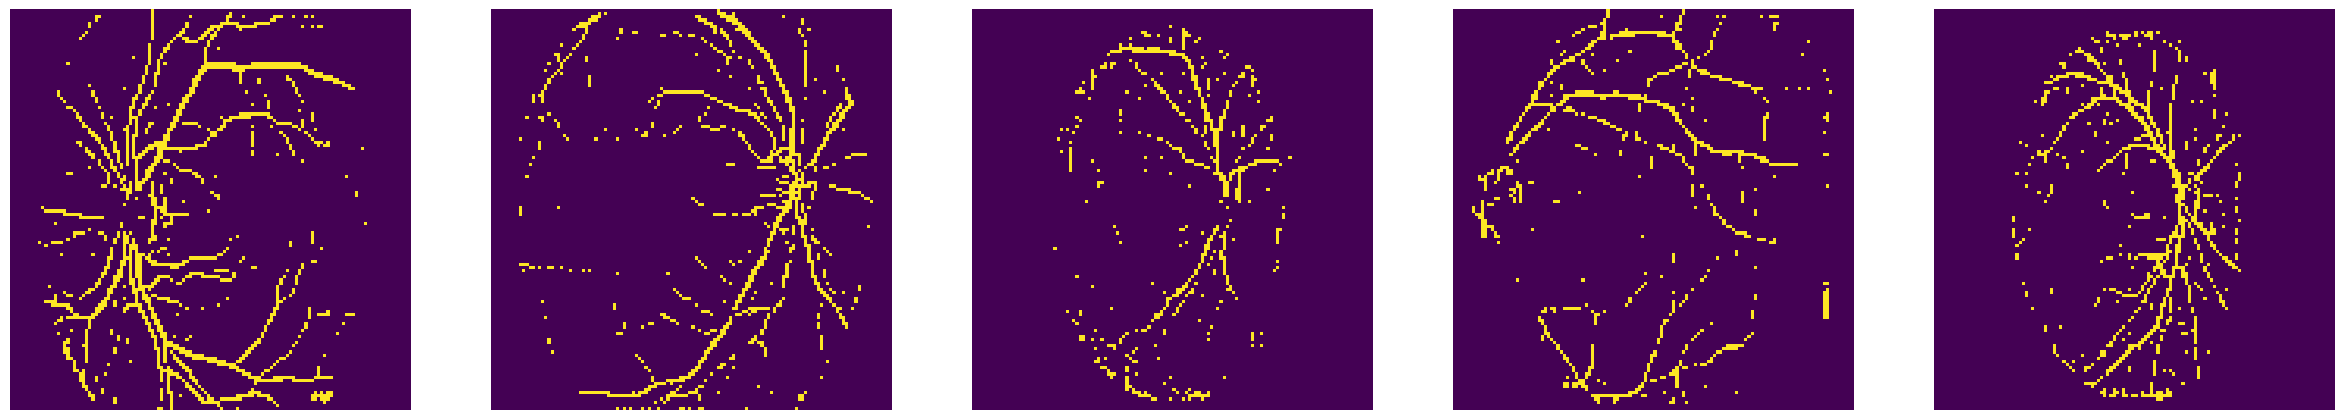


Sample images of class :  SEVERE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


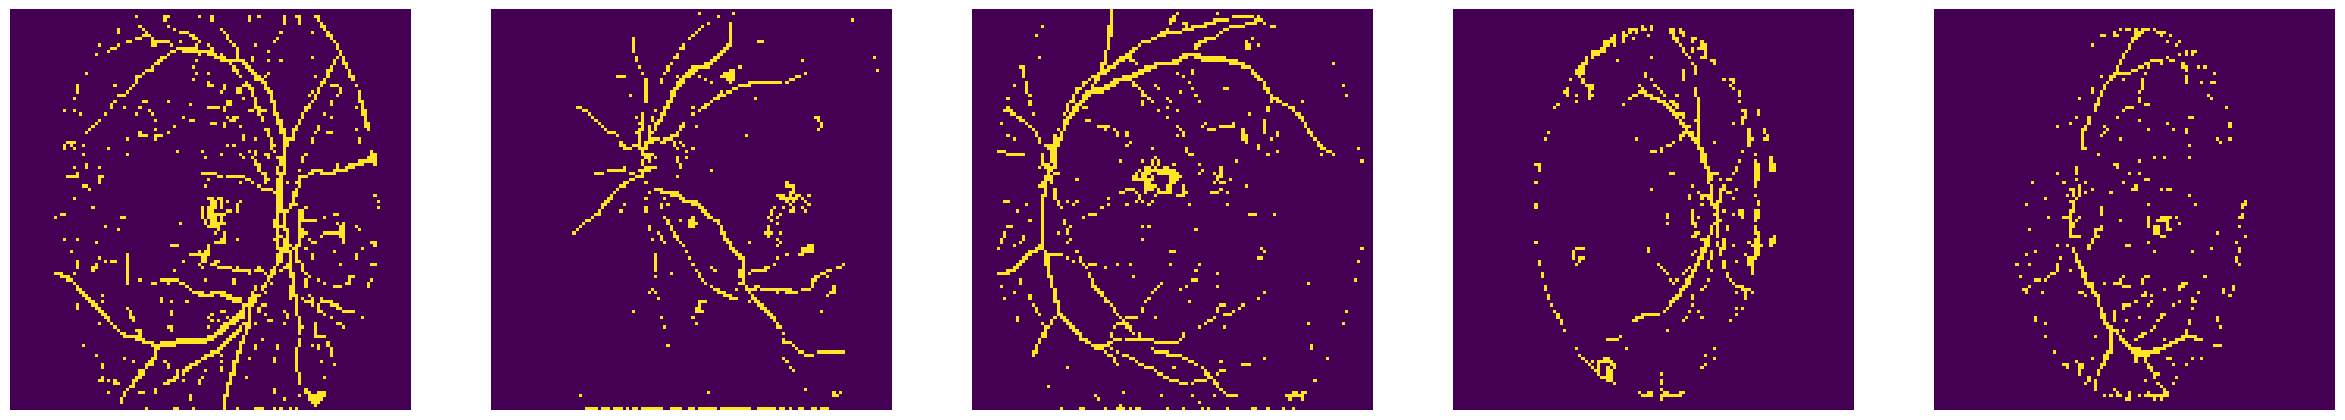


Sample images of class :  MODERATE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


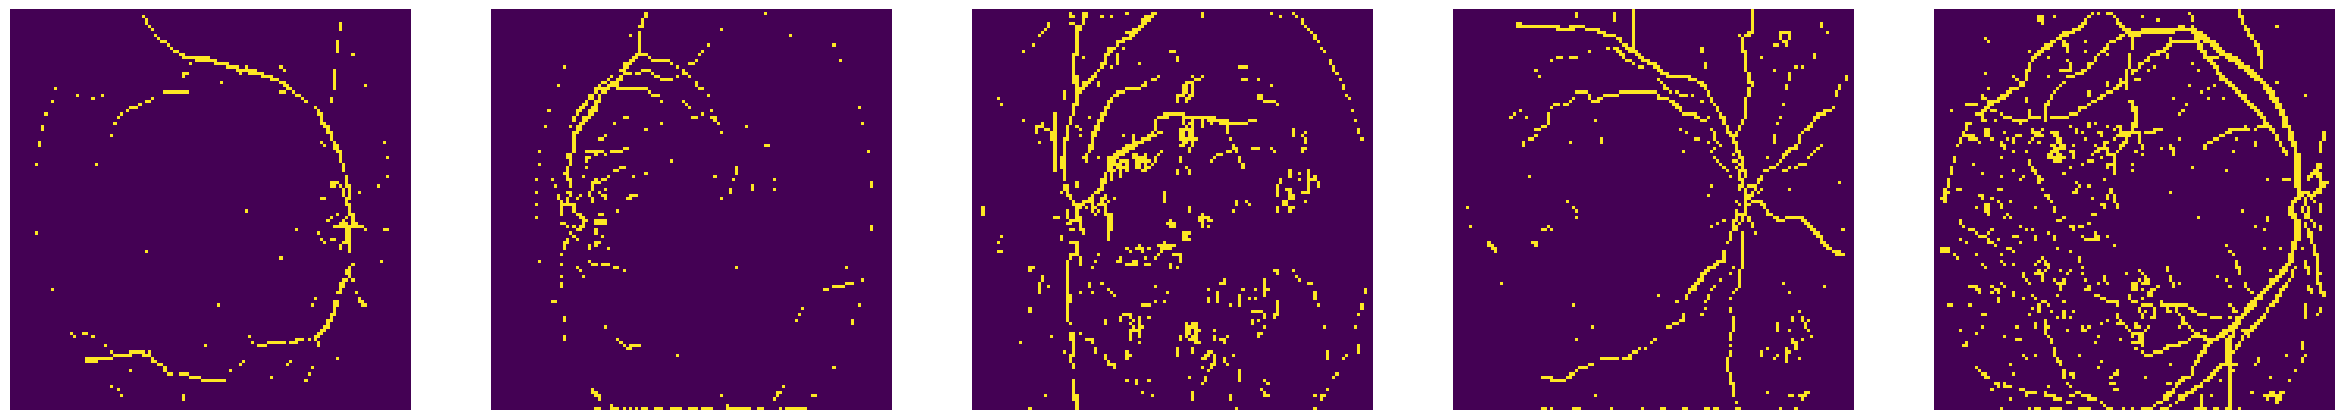


Sample images of class :  MILD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


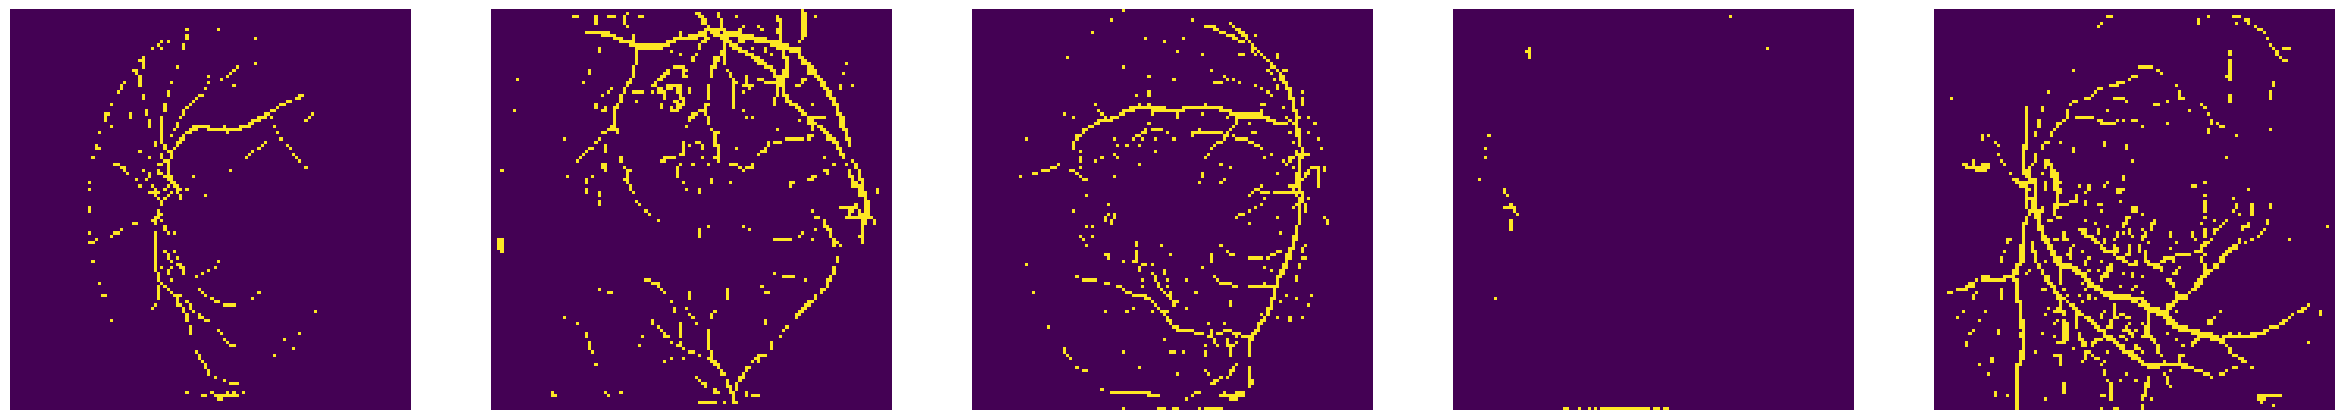

In [40]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

#load the model
model_path="/content/drive/MyDrive/major /unet_best_model.h5"
model = tf.keras.models.load_model(model_path)

for i in list(d.keys()):
    print('\nSample images of class : ',i)
    images = d[i]
    plt.figure(figsize=(30,8))
    for j in range(len(images)):
        # img = mpimg.imread(images[j])
        img = predict_image(model,images[j])
        plt.subplot(1, n_images, j+1)
        plt.imshow(img)
        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        plt.axis("off")
    plt.show()

In [41]:
img.shape

(128, 128)

In [42]:
!rm -rf data2/

In [44]:
import tensorflow as tf
import os
import cv2
from tqdm.auto import tqdm

# Load the model correctly
model_path="/content/drive/MyDrive/major /unet_best_model.h5"
model = tf.keras.models.load_model(model_path)

# Create output directory
os.makedirs('data2', exist_ok=True)

# Function to check if a path is an image file
def is_image_file(filename):
    valid_extensions = {".png", ".jpg", ".jpeg", ".bmp", ".tiff"}
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Iterate through folders and process images
for fol in os.listdir('data'):
    os.makedirs(f'/content/data2/{fol}', exist_ok=True)

    for cls in tqdm(os.listdir(f'/content/data/{fol}')):
        cls_path = f"/content/data/{fol}/{cls}"

        # Ensure it's a directory before processing
        if not os.path.isdir(cls_path):
            continue

        os.makedirs(f"/content/data2/{fol}/{cls}", exist_ok=True)

        for idx, img in enumerate(os.listdir(cls_path)):
            img_path = os.path.join(cls_path, img)

            # Skip if it's not an image file
            if not is_image_file(img):
                continue

            # Ensure predict_image function is defined
            mask = predict_image(model, img_path)

            # Save the predicted mask
            cv2.imwrite(f'/content/data2/{fol}/{cls}/{idx+1}.png', mask)


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

In [6]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [3]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()

In [4]:
!pip install scikit-plot

In [7]:
!pip install scipy==1.10.1 --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.1 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.


In [45]:
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, balanced_accuracy_score

print(tf.__version__)



2.18.0


In [46]:
# Input layer
inputs = tf.keras.layers.Input(shape=(128, 128, 1))

# 1 - Convolution
x = tf.keras.layers.Conv2D(64, (3,3), padding='same')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# 2nd Convolution layer
x = tf.keras.layers.Conv2D(128, (5,5), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# 3rd Convolution layer
x = tf.keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# 4th Convolution layer
x = tf.keras.layers.Conv2D(512, (3,3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# Flattening
x = tf.keras.layers.Flatten()(x)

# Fully connected layer 1st layer
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)

# Fully connected layer 2nd layer
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)

# Output layer
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

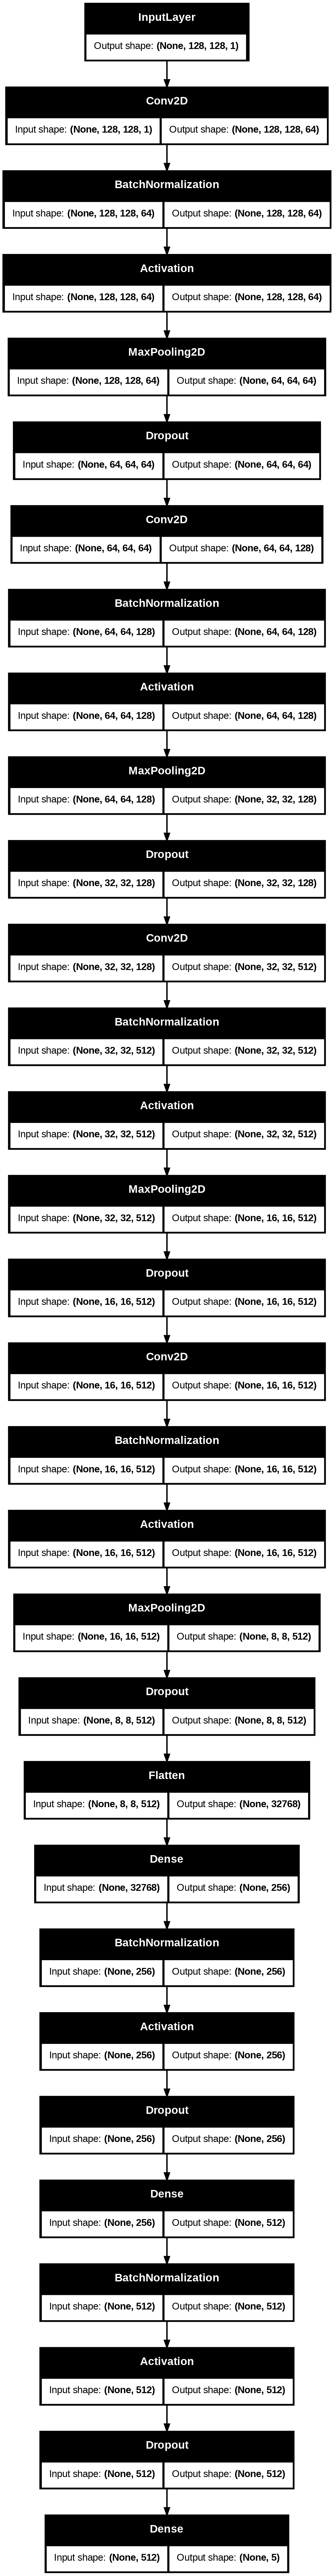

In [48]:
# Create the model
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
tf.keras.utils.plot_model(model, 'model2.png', show_shapes=True)

In [49]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 32, 32, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 11,686,661 (44.58 MB)

 Trainable params: 11,682,693 (44.57 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [50]:
import os
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy'])
os.system("/content/drive/MyDrive/major /sample1/default.sh")

32512

In [51]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0,
                                                                horizontal_flip=True,
                                                                vertical_flip=False)

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255 )

In [53]:

train_dir = '/content/data2/train'
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=128,
        class_mode='categorical',
        shuffle = True ,
        color_mode="grayscale")

y_train = train_generator.classes

test_dir = '/content/data2/test'
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=128,
        class_mode='categorical',
        shuffle = True ,
        color_mode="grayscale")

Found 3412 images belonging to 5 classes.
Found 855 images belonging to 5 classes.


In [54]:
from collections import Counter
counter = Counter(train_generator.classes)
max_val = float(max(counter.values()))
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
class_weights

{0: 1.0,
 1: 1.0798569725864124,
 2: 1.1212871287128714,
 3: 2.1990291262135924,
 4: 2.0268456375838926}

In [55]:
import os
train_path = '/content/data2/train'
test_path = '/content/data2/test'
n_classes = 0
n_len_training = 0
d = {}
print('Training Files Details :\n')
for i in sorted(os.listdir(train_path)):
    print(f"Class Name = {i}")
    n_classes+=1
    l = len(os.listdir(os.path.join(train_path,i)))
    d[i] = [l]
    n_len_training+=l
    print(f"No of Images = {l}")
    print('='*50)

print(f'\nTotal No of Training Images = {n_len_training}')
print('='*50)
n_len_testing = 0
print('\n\nTest Files Details :\n')
for i in sorted(os.listdir(test_path)):
    print(f"Class Name = {i}")
    l = len(os.listdir(os.path.join(test_path,i)))
    d[i].append(l)
    n_len_testing+=l
    print(f"No of Images = {l}")
    print('='*50)
print(f'\nTotal No of Testing Images = {n_len_testing}')
print('='*50)
print(f'\n\nNo of classes = {n_classes}')

Training Files Details :

Class Name = MILD
No of Images = 906
Class Name = MODERATE
No of Images = 839
Class Name = NODR
No of Images = 808
Class Name = PDR
No of Images = 412
Class Name = SEVERE
No of Images = 447

Total No of Training Images = 3412


Test Files Details :

Class Name = MILD
No of Images = 227
Class Name = MODERATE
No of Images = 210
Class Name = NODR
No of Images = 203
Class Name = PDR
No of Images = 103
Class Name = SEVERE
No of Images = 112

Total No of Testing Images = 855


No of classes = 5


In [57]:
batch_size = 128
steps_per_epoch = n_len_training // batch_size
validation_batch_size = 128
validation_steps = n_len_testing // validation_batch_size

In [58]:
print('Results for CNN Classifier:-\n')
start_time = time.time()

result = model.fit(train_generator,
                   validation_data = validation_generator,
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch,
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps,
                   class_weight = class_weights,
                   epochs = 150)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for CNN Classifier:-

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.2548 - loss: 2.5756 - val_accuracy: 0.2344 - val_loss: 1.6053
Epoch 2/150
 1/26 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - accuracy: 0.3672 - loss: 2.1882

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.3672 - loss: 2.1882 - val_accuracy: 0.2448 - val_loss: 1.6032
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 260ms/step - accuracy: 0.3083 - loss: 2.2713 - val_accuracy: 0.2370 - val_loss: 1.6091
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3281 - loss: 1.9355 - val_accuracy: 0.2461 - val_loss: 1.6092
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 256ms/step - accuracy: 0.3351 - loss: 2.1398 - val_accuracy: 0.2396 - val_loss: 1.5961
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3125 - loss: 2.3430 - val_accuracy: 0.2318 - val_loss: 1.6052
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 260ms/step - accuracy: 0.3409 - loss: 2.1139 - val_accuracy: 0.2422 - val_loss: 1.6438
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2619 - loss: 2.3124 - val_accuracy: 0.2331 - val_loss: 1.6591
Epoch 9/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 311ms/step - accuracy: 0.3672 - loss: 2.0565 - val_accuracy: 0.2383 -

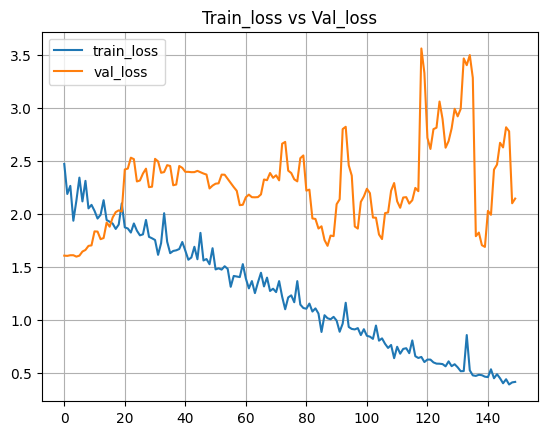

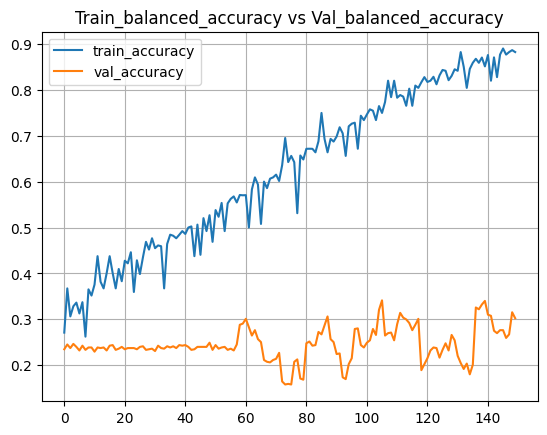

In [59]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'] , label = 'train_loss')
plt.plot(result.history['val_loss'] , label = 'val_loss')
plt.title('Train_loss vs Val_loss')
plt.legend()
plt.grid()
plt.show()

plt.plot(result.history['accuracy'] , label = 'train_accuracy')
plt.plot(result.history['val_accuracy'] , label = 'val_accuracy')
plt.title('Train_balanced_accuracy vs Val_balanced_accuracy')
plt.legend()
plt.grid()
plt.show()

In [60]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0,
                                                                horizontal_flip=True,
                                                                vertical_flip=False)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=128,
        class_mode='categorical', #'binary'
        shuffle = False ,
        color_mode="grayscale" ) #'grayscale'

batch_size = 128
y_train = train_generator.classes

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1.0/255.0)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=128,
        class_mode='categorical', #'binary'
        shuffle = False ,
        color_mode="grayscale" ) #'grayscale'

test_batch_size = 128
y_test = test_generator.classes

Found 3412 images belonging to 5 classes.
Found 855 images belonging to 5 classes.


In [61]:
import numpy as np
start_time = time.time()
y_pred1 = model.predict(train_generator,batch_size = batch_size)
y_pred1 = np.argmax(y_pred1, axis=1)
print('\nTotal time(sec) = ',(time.time() - start_time))

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step

Total time(sec) =  5.2167885303497314


In [62]:
label_map = (train_generator.class_indices)
labels = list(label_map.keys())
labels

['MILD', 'MODERATE', 'NODR', 'PDR', 'SEVERE']

In [63]:
label_map

{'MILD': 0, 'MODERATE': 1, 'NODR': 2, 'PDR': 3, 'SEVERE': 4}

In [64]:
import scikitplot as skplt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

start_time = time.time()
y_pred = model.predict(test_generator,batch_size = test_batch_size)
y_pred = np.argmax(y_pred, axis=1)
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)

cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = accuracy_score(y_train,y_pred1)
acc2_model = accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))

print('\n')
print((test_generator.class_indices))
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

CNN = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.11/dist-packages/scipy/__init__.py)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 848ms/step
Prediction time (sec) = 5.37

Training Accuracy = 0.4575
Testing Accuracy = 0.3076

Misclassified for class MILD (test data) = 213
Misclassified for class MODERATE (test data) = 206
Misclassified for class NODR (test data) = 17
Misclassified for class PDR (test data) = 66
Misclassified for class SEVERE (test data) = 90
Total misclassified points (test data) = 592
Total % misclassified (test data) = 69.24%

Class Indices: {'MILD': 0, 'MODERATE': 1, 'NODR': 2, 'PDR': 3, 'SEVERE': 4}


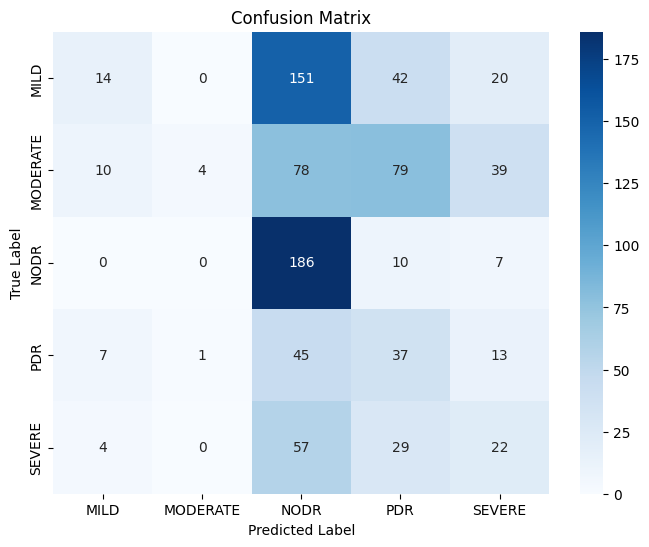


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.06      0.11       227
           1       0.80      0.02      0.04       210
           2       0.36      0.92      0.52       203
           3       0.19      0.36      0.25       103
           4       0.22      0.20      0.21       112

    accuracy                           0.31       855
   macro avg       0.39      0.31      0.22       855
weighted avg       0.44      0.31      0.22       855

**********************************************************************


In [65]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Start time for prediction
start_time = time.time()
y_pred = model.predict(test_generator, batch_size=test_batch_size)
y_pred = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels
model_time2 = time.time() - start_time

print(f'Prediction time (sec) = {model_time2:.2f}')

# Compute confusion matrix
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred != y_test.ravel())
acc1_model = accuracy_score(y_train, y_pred1)  # Ensure `y_pred1` is defined
acc2_model = accuracy_score(y_test, y_pred)

print(f'\nTraining Accuracy = {acc1_model:.4f}')
print(f'Testing Accuracy = {acc2_model:.4f}\n')

# Print misclassification per class
for i, label in enumerate(labels):
    err = np.sum(cm_model[i]) - cm_model[i][i]
    print(f'Misclassified for class {label} (test data) = {err}')

print(f'Total misclassified points (test data) = {model_miss}')
print(f'Total % misclassified (test data) = {model_miss / len(y_test) * 100:.2f}%\n')

print('Class Indices:', test_generator.class_indices)

# **Plot Confusion Matrix**
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **Print Classification Report**
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('*' * 70)

# Store results in a list
CNN = [acc1_model, acc2_model, model_miss, model_miss / len(y_test), model_time, model_time2]


In [66]:
os.system("/content/drive/MyDrive/major /sample1/default.sh")
model.save('/content/cnn_model.h5')

In [72]:

!cp /content/cnn_model.h5 "/content/drive/MyDrive/major "

In [73]:
!cp /content/cnn_model.h5 /content/saved_model.h5


In [74]:
from google.colab import files
files.download('/content/saved_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>